In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
df=pd.read_csv('Titanic-Dataset.csv')
# 1.Basic Info
print("Initial Dataset Basic Info:",df.info())
print("Missing Values count:",df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Initial Dataset Basic Info: None
Missing Values count: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0

In [12]:
# 2.Handling Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True, errors='ignore')
df.dropna(subset=['Fare'], inplace=True)
print("Columns after cleaning:", df.columns.tolist())

Columns after cleaning: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [13]:
# 3. Convert Categorical values to numerical
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
print("\nEncoded 'Sex' column unique values:", df['Sex'].unique())
print("Encoded 'Embarked' column unique values:", df['Embarked'].unique())


Encoded 'Sex' column unique values: [1 0]
Encoded 'Embarked' column unique values: [2 1 0]


In [14]:
# 4. Normalize/Standardize numerical features
scaler = StandardScaler()
num_cols =['Age', 'Fare','Pclass', 'SibSp', 'Parch']
num_cols = [col for col in num_cols if col in df.columns]
df[num_cols] = scaler.fit_transform(df[num_cols])
print("\nMeans after scaling (should be ~0):",df[num_cols].mean())
print("\nStandard deviations after scaling (should be ~1):",df[num_cols].std())


Means after scaling (should be ~0): Age      -1.833659e-17
Fare     -9.168293e-17
Pclass    3.208903e-17
SibSp     4.584147e-18
Parch    -2.750488e-17
dtype: float64

Standard deviations after scaling (should be ~1): Age       1.000646
Fare      1.000646
Pclass    1.000646
SibSp     1.000646
Parch     1.000646
dtype: float64


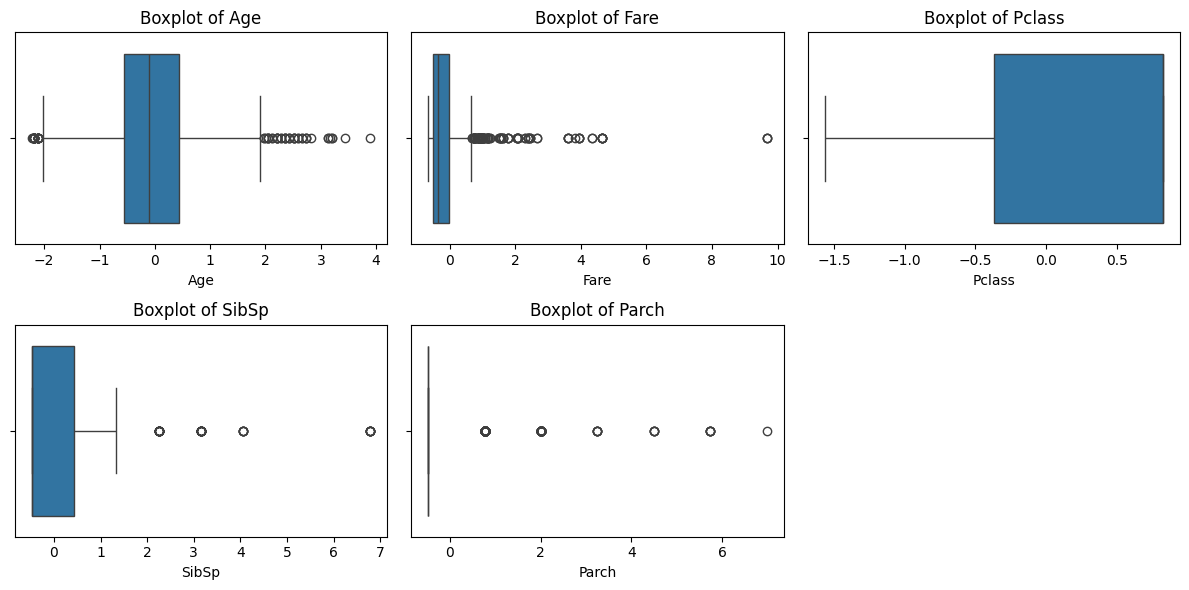

In [8]:
# 5. Visualize the data
plt.figure(figsize=(12, 6))
for i,col in enumerate(num_cols,1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [9]:
#Remove outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare']>= Q1 - 1.5 * IQR) & (df['Fare']<= Q3 + 1.5 * IQR)]
print(df.head())

   PassengerId  Survived    Pclass  \
0            1         0  0.827377   
2            3         1  0.827377   
3            4         1 -1.566107   
4            5         0  0.827377   
5            6         0  0.827377   

                                           Name  Sex       Age     SibSp  \
0                       Braund, Mr. Owen Harris    1 -0.565736  0.432793   
2                        Heikkinen, Miss. Laina    0 -0.258337 -0.474545   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312  0.432793   
4                      Allen, Mr. William Henry    1  0.433312 -0.474545   
5                              Moran, Mr. James    1 -0.104637 -0.474545   

      Parch            Ticket      Fare  Embarked  
0 -0.473674         A/5 21171 -0.502445         2  
2 -0.473674  STON/O2. 3101282 -0.488854         2  
3 -0.473674            113803  0.420730         2  
4 -0.473674            373450 -0.486337         2  
5 -0.473674            330877 -0.478116         1  
